# Data visualization

In this 2nd notebook, I'll be visualizing the data to get a better understanding on how the features in the dataset are distributed and how they relate to the target variable 'loan_status', indicating if someone default on their loan or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass

In [2]:
password = getpass.getpass()

········


# Loading the data

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/LendingClub'
engine = create_engine(connection_string)
query = '''SELECT *
FROM LendingClub.loans'''

df = pd.read_sql_query(query, engine)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_income,verification_status,loan_status,purpose,...,dti,delinq_2yrs,inq_last_6mths,open_accounts,pub_rec_derogatory,revol_balance,revol_util_rate,total_accounts,pub_rec_bankruptcies,years_succes_loans
0,5000,36 months,0.1065,162.87,B2,RENT,24000,Verified,0,credit_card,...,0.2765,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,0.0,31
1,2500,60 months,0.1527,59.83,C4,RENT,30000,Source Verified,1,car,...,0.0100,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,0.0,17
2,2400,36 months,0.1596,84.33,C5,RENT,12252,Not Verified,0,small_business,...,0.0872,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,0.0,15
3,10000,36 months,0.1349,339.31,C1,RENT,49200,Source Verified,0,other,...,0.2000,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,0.0,20
4,5000,36 months,0.0790,156.46,A4,RENT,36000,Source Verified,0,leisure,...,0.1120,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,0.0,12


In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_income', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_accounts', 'pub_rec_derogatory', 'revol_balance',
       'revol_util_rate', 'total_accounts', 'pub_rec_bankruptcies',
       'years_succes_loans'],
      dtype='object')

# Plotting the categorical variables

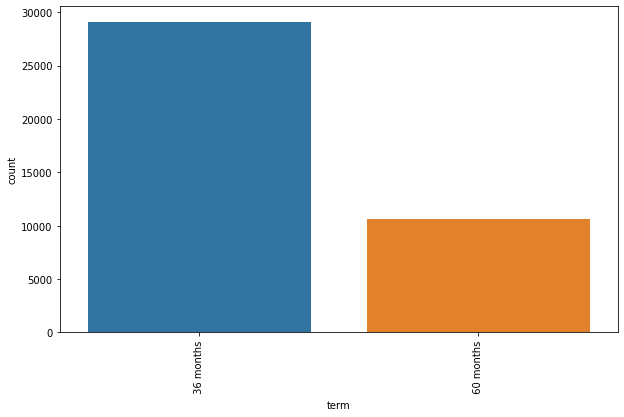

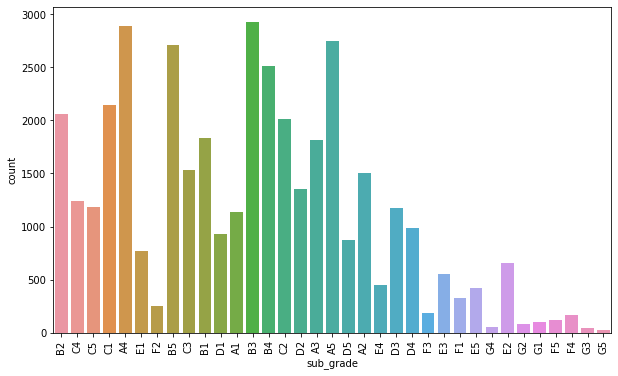

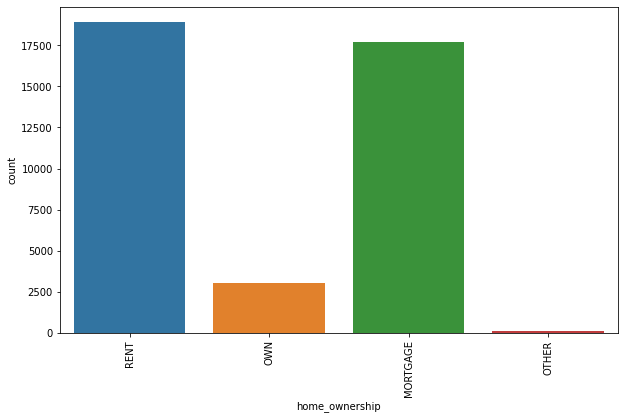

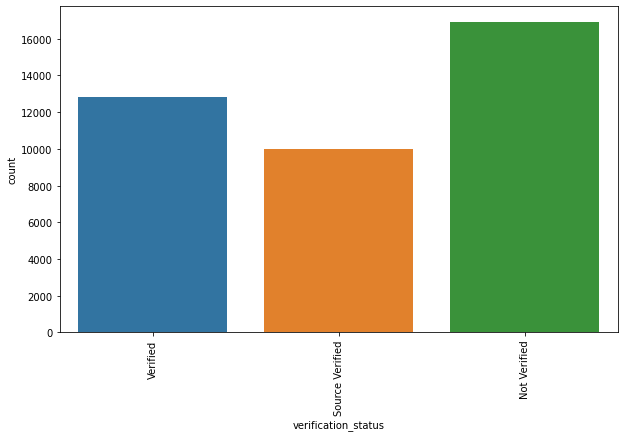

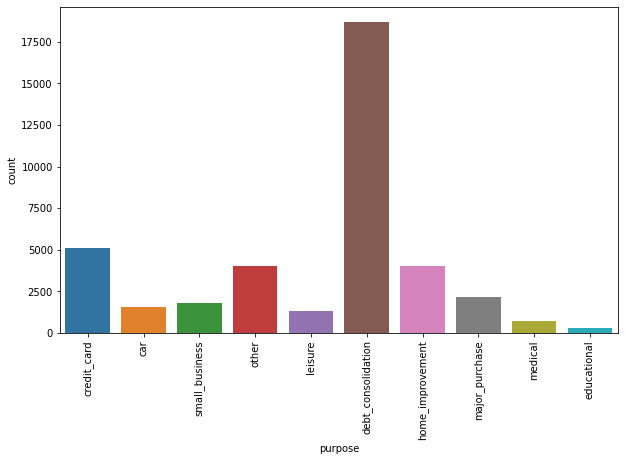

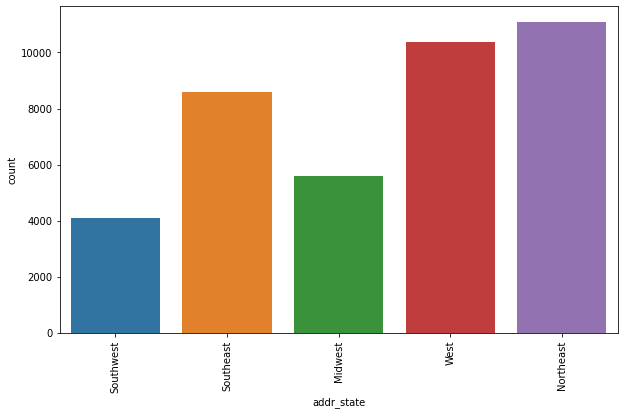

In [4]:
def countplot_cat(df):
    for c in df:
        plt.figure(figsize=(10,6))
        sns.countplot(x=c, data=df)
        plt.xticks(rotation=90)
        plt.show()
    return None

countplot_cat(df.select_dtypes(object))

The plots above already show some interesting insights: 

## Loan terms & subgrades
We can see the majority of the members ask for a term of 36 months to pay off their loan.
The LendingClub takes the term in account when assiging a grade to a loan, a grade determines the amount of interest a member has too pay. This shorter term preference could be explained by that as a person naturally prefers the lowest interest rate possible. This also becomes clear in the sub_grade plot, the majority of loan grades are within A, B, C and D, the lowest interest rates.

## Home Ownership
Furthermore we can see that the majority of LC members rents a house or has a mortgage. A very low number has no house at all. This is an interesing feature as it doesn't seem very logic one cannot own a house but can still get a loan. This might have an interesting impact on the target variable, although the numbers are small.

## Source verification
Interestingly enough, most incomes are not verified. As you would expect income to be a very important feature in someone being able to pay back a loan. The verified features are following close. It will be interesting if the member's income has an influence or not. Perhaps this could explain whether verifying is less important for the LC.

## Loan purpose
By far most of the loans in this dataset are used for the purpose of debt consolidation, the other categories are distributed pretty evenly so could give some interesting insights.

## Members residential state
The members in this dataset live pretty spread out over the US, with smallest amount in the SouthEast. 



# Plotting variables against target

In the cleaning phase I already plotted 'sub_grade' against the target variable and found that most defaulters are in grade F and G. I also plotted 'delinq_2_years' against the target which showed me that the members who had deliquencies in the last 2 years are often also defaulters. In this section I will plot some more features against the target to get a better insight. 

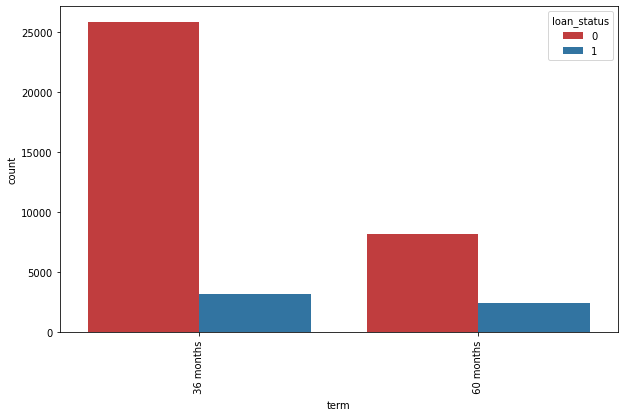

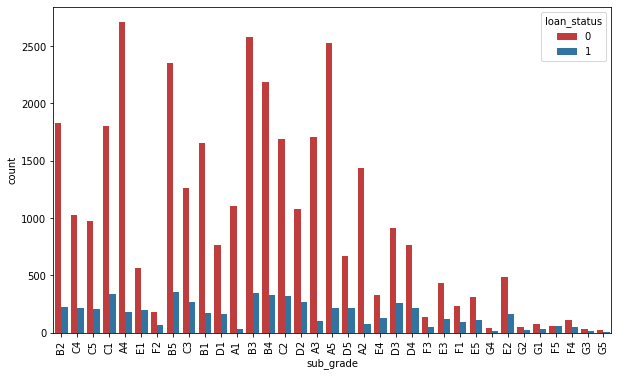

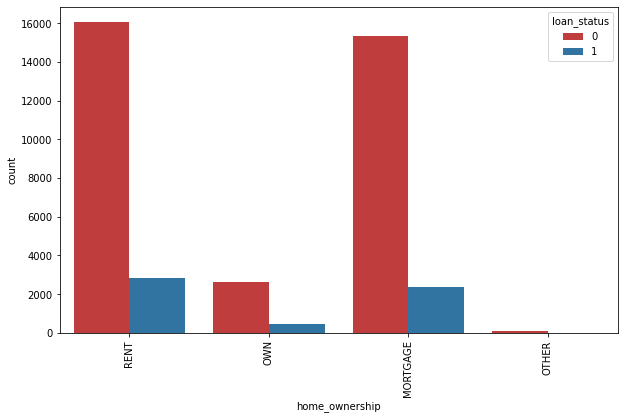

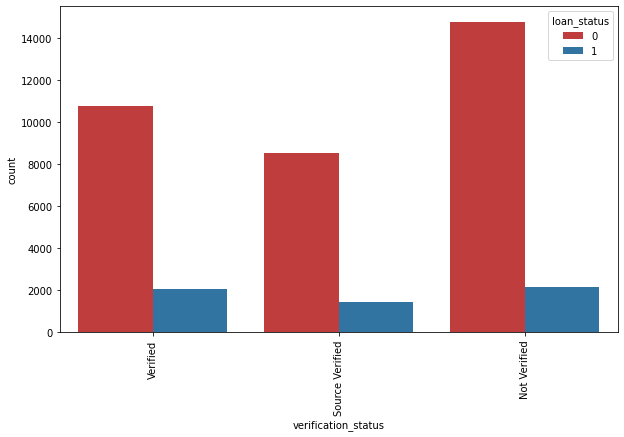

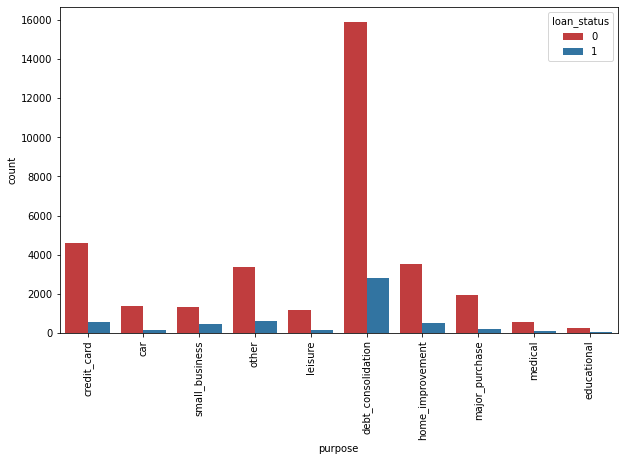

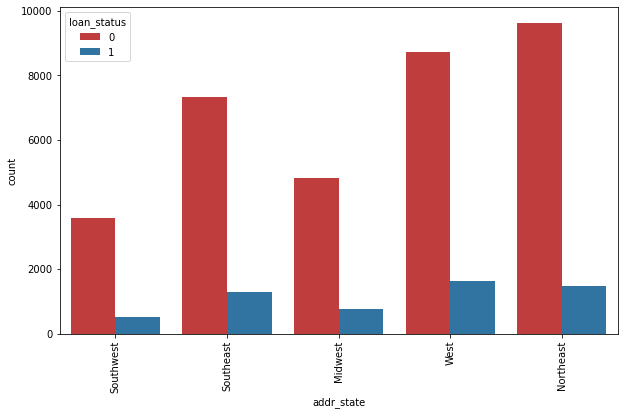

In [5]:
def barplot_cat(df,column):
    for c in df:
        plt.figure(figsize=(10,6))
        sns.countplot(x=c, data=df, hue=column,palette=["C3", "C10"])
        plt.xticks(rotation=90)
        plt.show()
    return None

barplot_cat(df.select_dtypes(object),df['loan_status'])

The above plots show us some inisghts. I've also plotted the same graphs in Tableau to get a better view of the ratio of defaulted loans. I did not get these ratios to work in python for some reason. 

We can see that the amount of defaulters in relation to amount of paid of loans is higher for loans with a term of 6 months. Also for verified sources the defaulters look a bit higher. Furthermore, looking at purpose, it seems that small business have pretty high ratio of defaulters as well. In the other variables the ratio seems to be more even with smaller differences between the values. They could still influence the predictions, but it's good to keep an eye out on the purpose, term and sub_grade of the loan (as we saw in the cleaning phase)

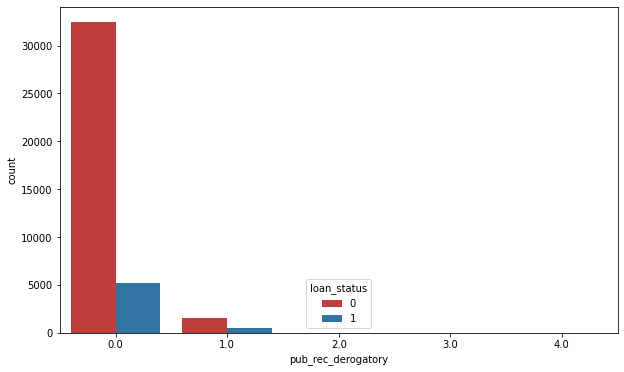

In [25]:
#This plot also clearly shows that if there is a public record of derogatory a member is likely to default.  
plt.figure(figsize=(10,6))
sns.countplot(x=df['pub_rec_derogatory'], data=df, hue=df['loan_status'],palette=["C3", "C10"])
plt.show()

# Plotting continuous variables

Below I plotted 'loan_amnt' and 'total_accounts' to get a better view of the differences between members 

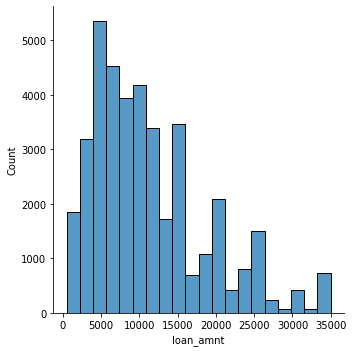

In [32]:
#the plot below show us that the majority of loans are between 5000 and 10000 dollars.
# there are few high loans 30000 and 35000 dollars, but they are less common
sns.displot(x='loan_amnt', data=df,bins=20)
plt.show()

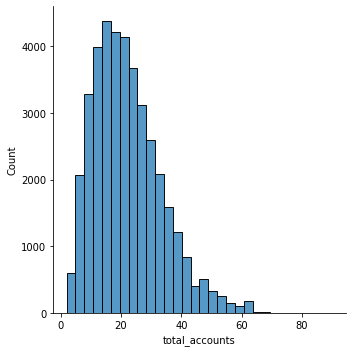

In [36]:
# the plot below shows me that the majority of members has around 15 and 25 open accounts
#indicating they have had between that number of succesful loans
#if a member has around that amount of open account the probability they will default on a loan is a lot less likely, since they have done it succesfully so many times before. 
sns.displot(x='total_accounts', data=df,bins=30)
plt.show()

Now that I have a bit better of an understanding on how the data is distributed and how relationships between the target and some of the variables are, I can start building my model and see how they actually influence my default predictions. 